 ## **PROJECT BRIEF**## 



 

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in        investments so that she can take the investment decisions effectively.

 


### Business and Data Understanding###
  

Spark Funds has two minor constraints for investments:
 
 1. It wants to invest between 5 to 15 million USD per round of investment.
 2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would  invest in.

### Business Objectives###

The business objectives and goals of data analysis are pretty straightforward.

***Business objective*** 
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
***Goals of data analysis***
Your goals are divided into three sub-goals:
1. ***Investment type analysis*** 

Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
2. ***Country analysis*** 

Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
3. ***Sector analysis***

Understanding the distribution of investments across the eight main sectors. 

In [133]:
#Placing all the source files under project_data folder in present directory.
import os
os.listdir("project_data/")

['companies.txt',
 'Countries_where_English_is_an_official_language.pdf',
 'Investments.xlsx',
 'mapping.csv',
 'rounds2.csv']

In [134]:
import pandas as pd
companies = pd.read_csv("project_data/companies.txt", sep="\t", encoding="ISO-8859-1")
rounds2 = pd.read_csv("project_data/rounds2.csv", encoding="ISO-8859-1")

In [135]:
companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [136]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [137]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Hiwifi,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [138]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [139]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [140]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [141]:
#Determining unique companies present in 'companies'.
print(len(companies.permalink.unique()))

66368


In [142]:
#Determining unique companies present in 'rounds2'.
print(len(rounds2.company_permalink.unique()))


90247


In [143]:
#But, company_permalink attribute in rounds2 dataset is case-sensitive. In order to get a unique count we should normalize the data.
print(len(rounds2['company_permalink'].str.lower().unique()))

66370


Now, we have to ensure that the number of unique company names is less than the number of unique permalinks and this is possible by checking out for rows having same company name and concatenating them.

In [144]:
pd.concat(names for  _,names in companies.groupby("name") if len(names) > 1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/Organization/3Divaz-2,3DIVAZ,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/Organization/3Divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
3942,/Organization/Aps,APS,http://www.aps.com,Clean Technology,operating,NaN,NaN,NaN,NaN,NaN
3943,/Organization/Aps-Llc,APS,NaN,Real Estate,operating,USA,GA,Macon,Griffin,31-03-2011
3982,/Organization/Apx,APX,http://www.apxgroup.com,Clean Technology,operating,NLD,7,Amsterdam,Amsterdam,01-01-1999
3983,/Organization/Apx-2,APX,http://www.apx.com/,Energy Management|Environmental Innovation,operating,USA,CA,SF Bay Area,San Jose,NaN
1526,/Organization/Adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/Organization/Adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/Organization/Agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
1996,/Organization/Agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013


Now that the data above gives us the list of companies having same names under different categories , we will now look at this data using their permalinks and investment rates treating them as separate entities.

In [145]:
#let us now clean up the fields on which we are merging the two dataframes on.
companies['permalink']=companies['permalink'].str.lower()
#verify if the unique count is same in the absence of lower method.
print(len(companies.permalink.unique()))

66368


In [146]:
#Perform the same above operation for rounds2 dataframe
rounds2['permalink']=rounds2['company_permalink'].str.lower()
#verify if there is change in the unique count in the absence of lower method.
print(len(rounds2.permalink.unique()))

66370


Now that we have verified that the unique count hasn't changed in both the dataframes, there is an observation to be noted after looking at the values of their unique count. The difference between the unique count of rounds2 and companies is 2 which means that there are 2 missing values of companies information in rounds2 dataframe. 

We now have to find the entries of the rounds2 dataframe which doesn't match with the entries of companies dataframe.

In [147]:
rounds2_left = pd.merge(rounds2, companies, how='left', on='permalink', indicator=True)
left = rounds2_left[rounds2_left['_merge'] != 'both']
left

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN,/organization/e-cãbica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN,/organization/energystone-games-çµç³æ¸¸æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN,/organization/huizuche-com-æ ç§ÿè½¦,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0,/organization/magnet-tech-ç£ç³ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN,/organization/weiche-tech-åè½¦ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN,/organization/zengame-ç¦ æ¸¸ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [148]:
#number of entries on rounds2 which doesnt match with the entries in companies dataframe
len(left)

7

In [149]:
#total number of rows present in rounds2 dataframe
len(rounds2)

114949

### Merging rounds2 table to companies table

Now, the difference between the total number of rows in rounds2 table and the number of rows with no matching entries with companies table yields us the total number of rows on our merged dataframe i.e; there should be 114949-7= 114942 rows in our merged table.

In [150]:
master_frame = pd.merge(rounds2,companies, how='inner', on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [151]:
# Determining the shape of master_frame.
master_frame.shape

(114942, 16)

In [152]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


### Data Cleaning###

In [153]:
#Finding the missing columns in the master dataframe
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [154]:
#Summing up all the missing values column-wise
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [155]:
#Percentage of missing values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [156]:
#Removing non-contributing, duplicate columns
master_frame=master_frame.drop("company_permalink",axis=1)
master_frame=master_frame.drop("funding_round_code",axis=1)
master_frame=master_frame.drop("founded_at",axis=1)

#the resultant master dataframe after dropping of these columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)


funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

We now have to treat missing values for raised_amount_usd since it has the highest percentage of missing values in it. But as we know that the raised_amount_usd is an important attribute,removing it would be useless for our further analysis, so we can now try to find and delete the rows for which raised_amount_usd value is NaN. 

In [157]:
import numpy as np
#Removing NaN valued rows of raised_amount_usd
master_frame=master_frame[~np.isnan(master_frame['raised_amount_usd'])]
#Viewing missing data in master dataframe afer rows deletion
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

Now we have 6 columns with missing data and removing any more data would be concerning as the remaining rows has raised_amount_usd information. Hence it would be safe to ignore the missing values of state_code, region and city as theu dont weigh in for our final analysis. 

We can check if there are any rows which has missing values in all the 6 columns. 

In [158]:
#checking for rows with missing values in all the 6 fields.
master_frame[master_frame.isnull().sum(axis=1)>6].shape

(0, 13)


Now that we have no rows with missing values in all the 6 fields we can say that we have got our clean master_frame.

In [159]:
#Number of rows with missing values greater than 5
len(master_frame[master_frame.isnull().sum(axis=1)>5])

191

In [160]:
#calculating percentage of missing values greater than 5
round(100*len(master_frame[master_frame.isnull().sum(axis=1)>5].index)/len(master_frame.index),4)

0.2011

We can remove columns which do not contribute to our current analysis.

In [161]:
master_frame=master_frame.drop('homepage_url',axis=1)
master_frame=master_frame.drop('state_code',axis=1)
master_frame=master_frame.drop('region',axis=1)
master_frame=master_frame.drop('city',axis=1)
#Viewing missing data after column deletion
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
dtype: float64

Now that we have removed non-contributing columns from our dataset, lets check the amount of data that we have lost while cleaning up the source data.

In [162]:
#fraction of rows lost
round(len(master_frame.index)/114942,3)

0.826

We've lost 17% of our original data in cleaning.
Now that we cannot afford to lose any more data, lets impute the NaN values in category_list and country_code by 'value unknown' and 'not defined'.

In [163]:
#imputing NaNs by unknown_value and undefined
master_frame.loc[pd.isnull(master_frame['country_code']),['country_code']]='value_unknown'
master_frame.loc[pd.isnull(master_frame['category_list']),['category_list']]='undefined'
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)


funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [164]:
master_frame.shape

(94958, 9)

In [165]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94958 entries, 0 to 114941
Data columns (total 9 columns):
funding_round_permalink    94958 non-null object
funding_round_type         94958 non-null object
funded_at                  94958 non-null object
raised_amount_usd          94958 non-null float64
permalink                  94958 non-null object
name                       94957 non-null object
category_list              94958 non-null object
status                     94958 non-null object
country_code               94958 non-null object
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


In [166]:
master_frame.describe()

,raised_amount_usd
count,9.495800e+04
mean,1.042696e+07
std,1.148218e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680521e+06
75%,7.000000e+06
max,2.127194e+10


Now that we have our data cleaned with no missing values and duplicates. Let us proceed with our funding type analysis on our cleaned data.

### Funding Type Analysis###

The first of the 3 goals of data analysis is the investment type analysis.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

***Spark Funds wants to choose one of these four investment types for each potential investment they will make.***

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.


In [167]:
#averages of funding-types
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
secondary_market         7.964963e+07
private_equity           7.330859e+07
undisclosed              1.924237e+07
debt_financing           1.704353e+07
venture                  1.174895e+07
grant                    4.300576e+06
convertible_note         1.453439e+06
product_crowdfunding     1.363131e+06
angel                    9.586945e+05
seed                     7.197796e+05
equity_crowdfunding      5.383682e+05
non_equity_assistance    4.112031e+05
Name: raised_amount_usd, dtype: float64

In [168]:
#median of funding types
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
secondary_market         32600000.0
private_equity           20000000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
venture                   5000000.0
debt_financing            1100000.0
undisclosed               1018680.0
angel                      400000.0
seed                       275000.0
convertible_note           272000.0
grant                      201684.0
product_crowdfunding       183915.0
equity_crowdfunding        100000.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

Now that we have calculated the averages and medians of funding types, let us now represent the raised amount in USD for various funding types through a boxplot.

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

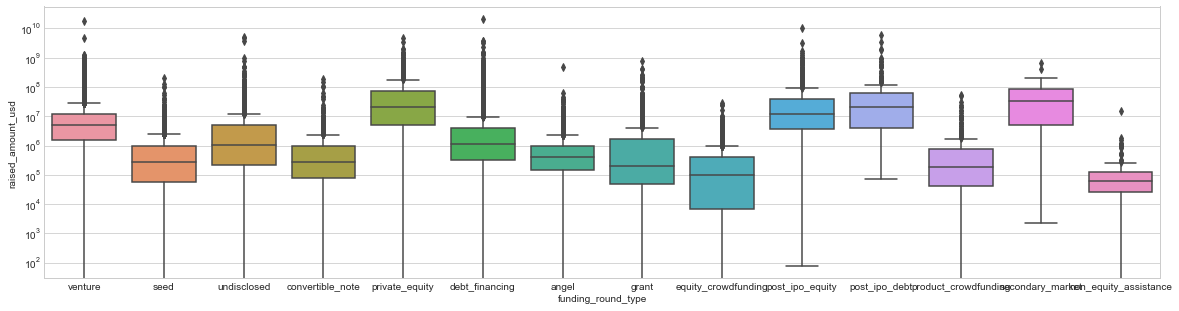

In [170]:
#boxplot of raised_amount_usd across various funding types
plt.figure(figsize=(20,5))
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.yscale('log')
plt.show()

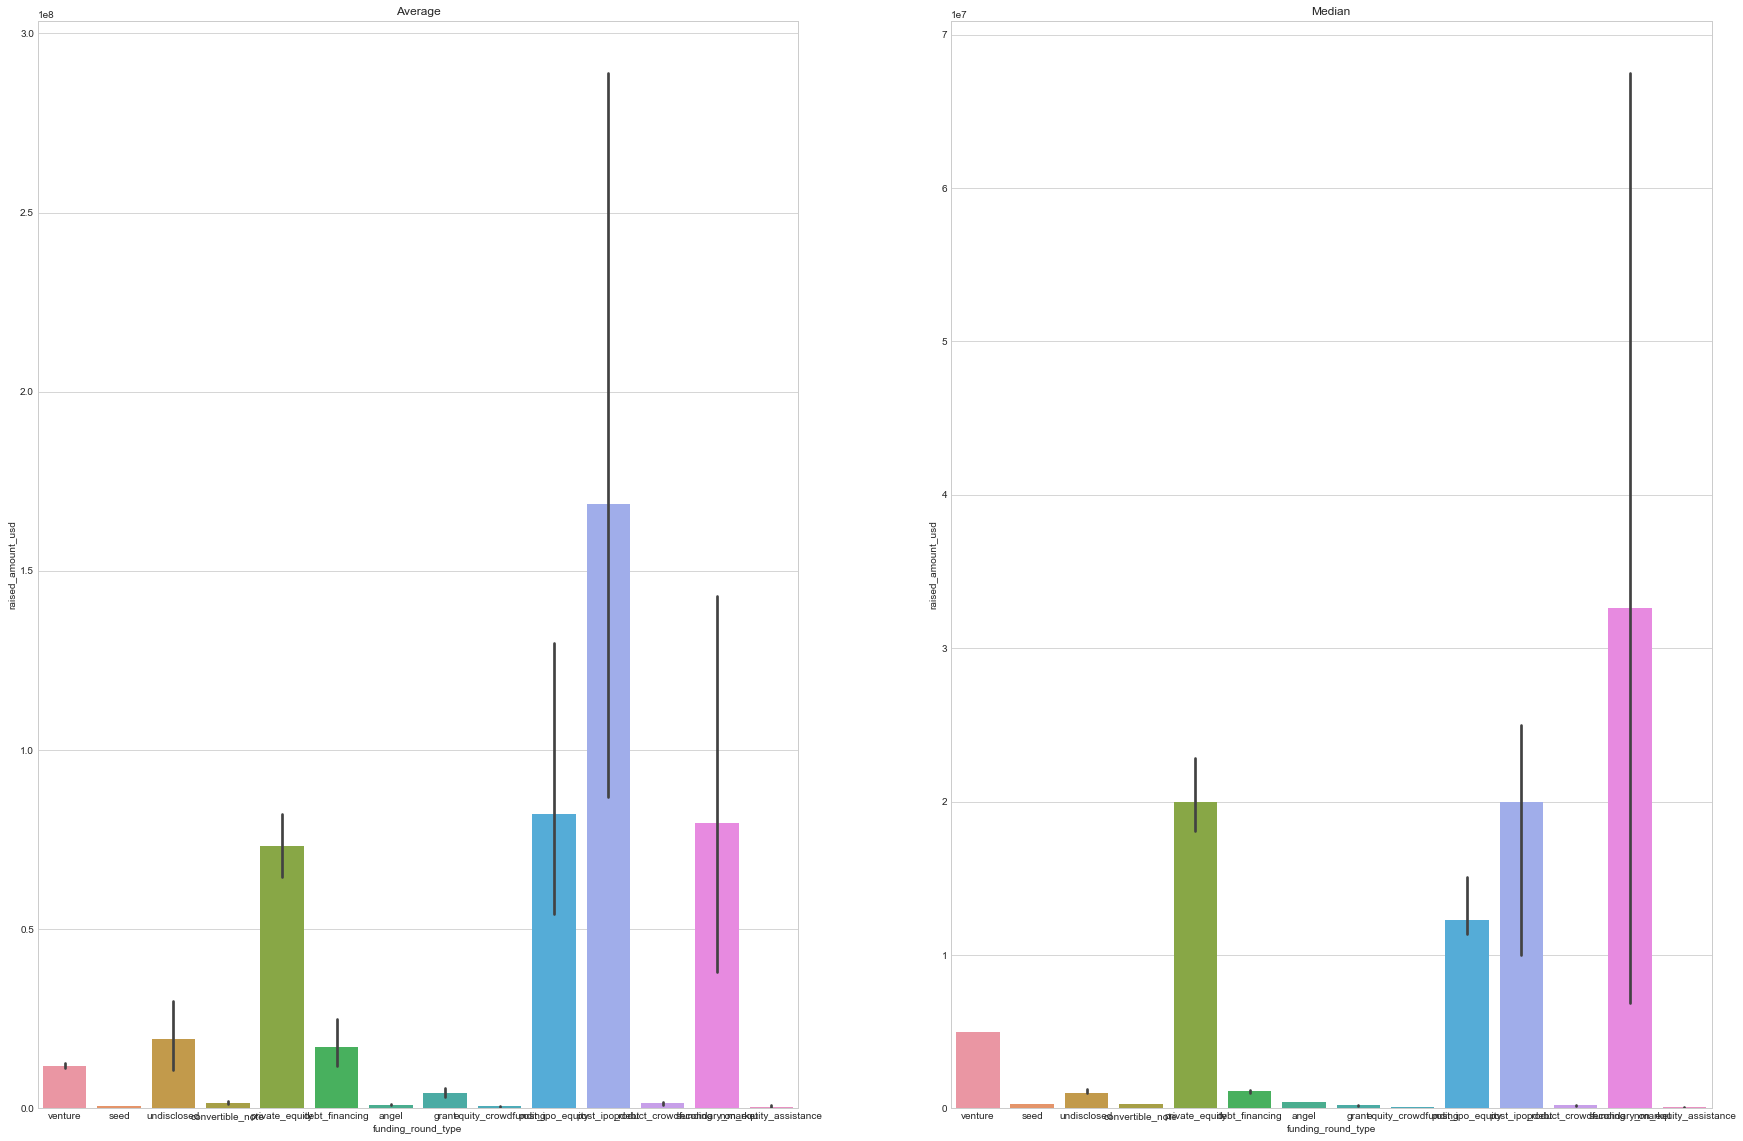

In [171]:
#Bar subplots for default statistic=mean and default statistic=median
plt.figure(figsize=(30,20))
#subplot 1: default statistic= mean
plt.subplot(1,2,1)
sns.barplot(x="funding_round_type",y='raised_amount_usd',data=master_frame)
plt.title('Average')
#subplot 2: default statistic= median
plt.subplot(1,2,2)
sns.barplot(x="funding_round_type",y='raised_amount_usd',data=master_frame, estimator=np.median)
plt.title('Median')
plt.show()

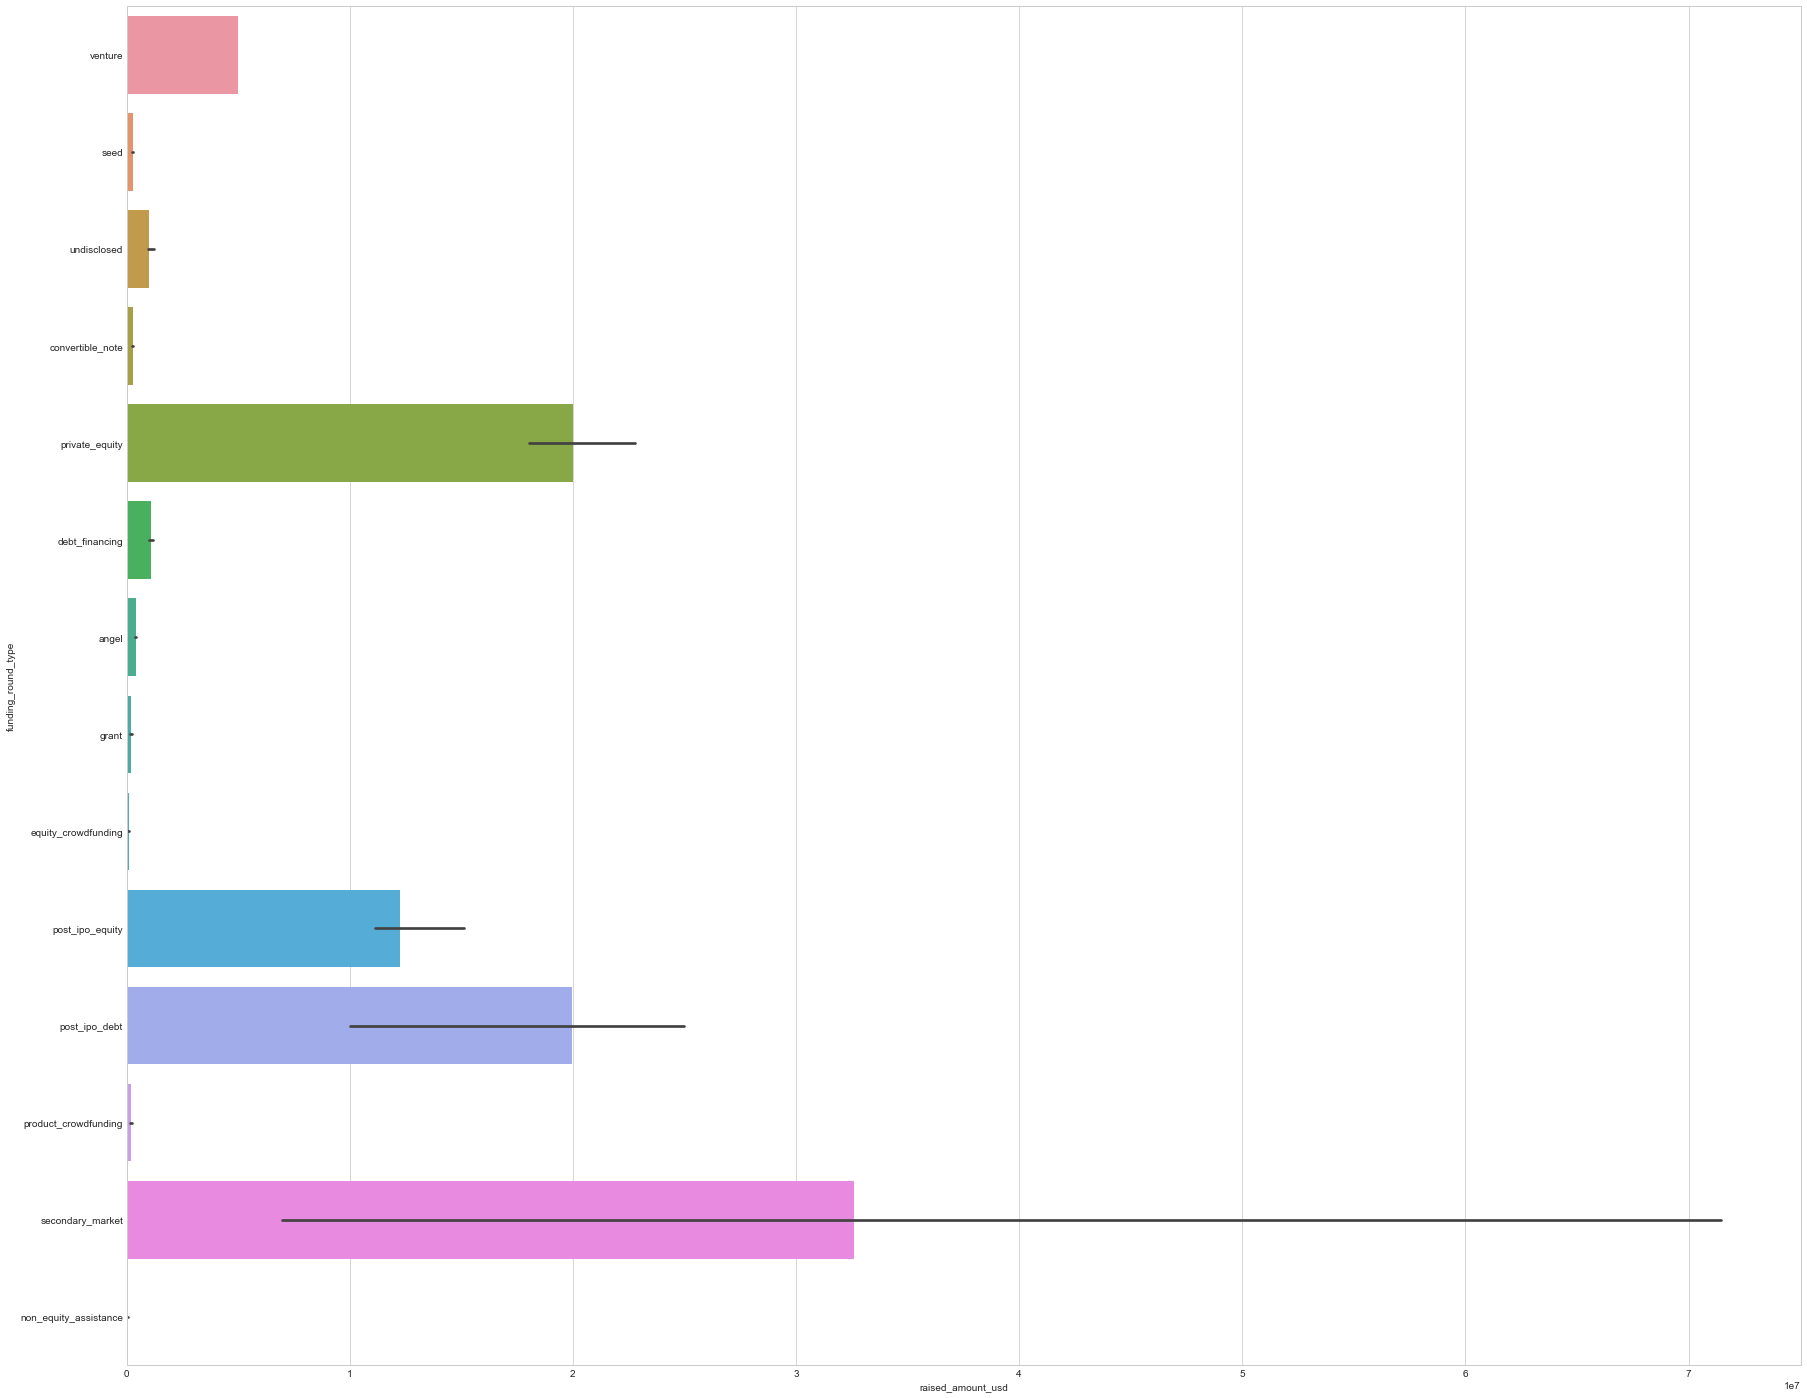

In [172]:
#plotting categorical value across y-axis
plt.figure(figsize=(30, 25))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

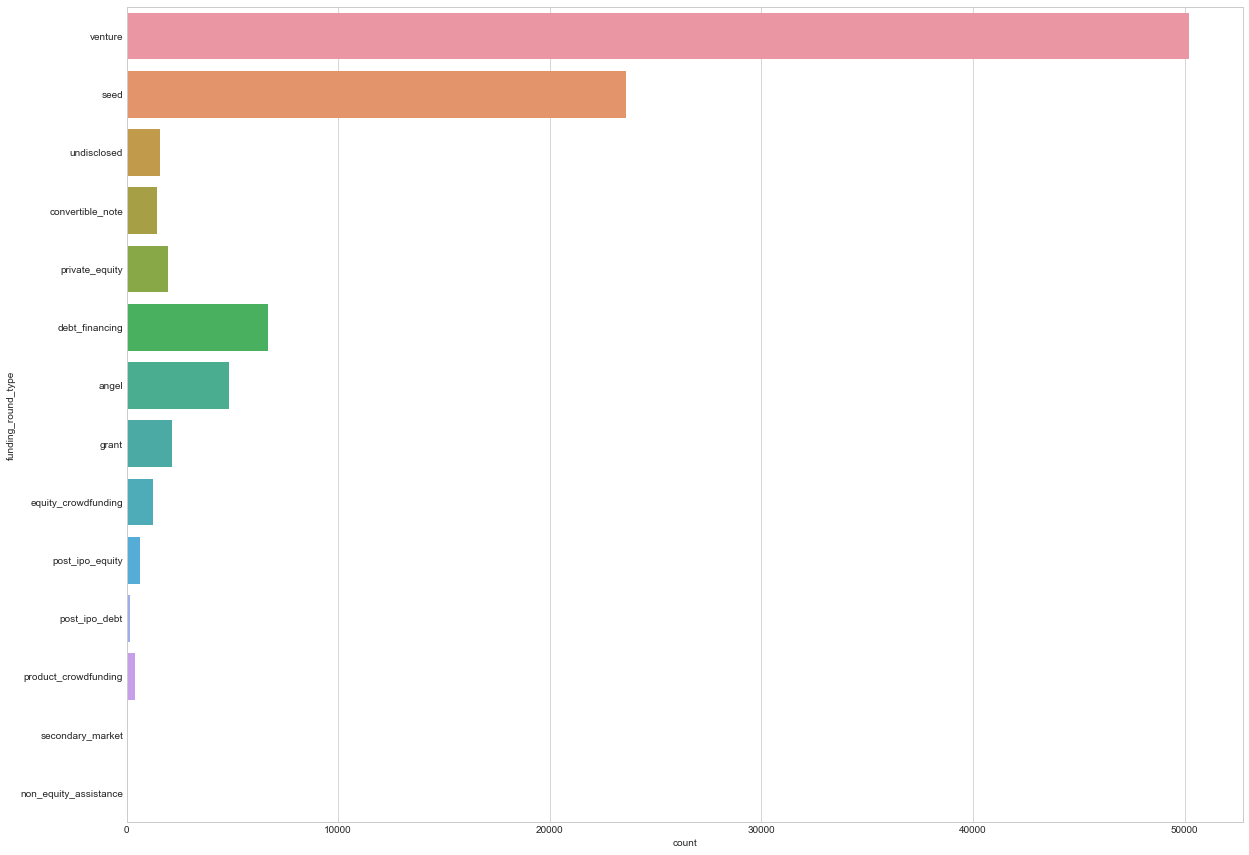

In [173]:
#plotting countplot across categorical value so that we could get the count of observations investing in the funding types.
plt.figure(figsize=(20,15))
sns.countplot(y='funding_round_type',data=master_frame)
plt.show()

Now, that it is quite clear through countplot that most number of investors invest in venture-type, let us now restrict the number of funding types to four.

In [174]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]


Now, that we have created a master frame with four funding types, let us plot a barplot for these funding types with default statistic mean.

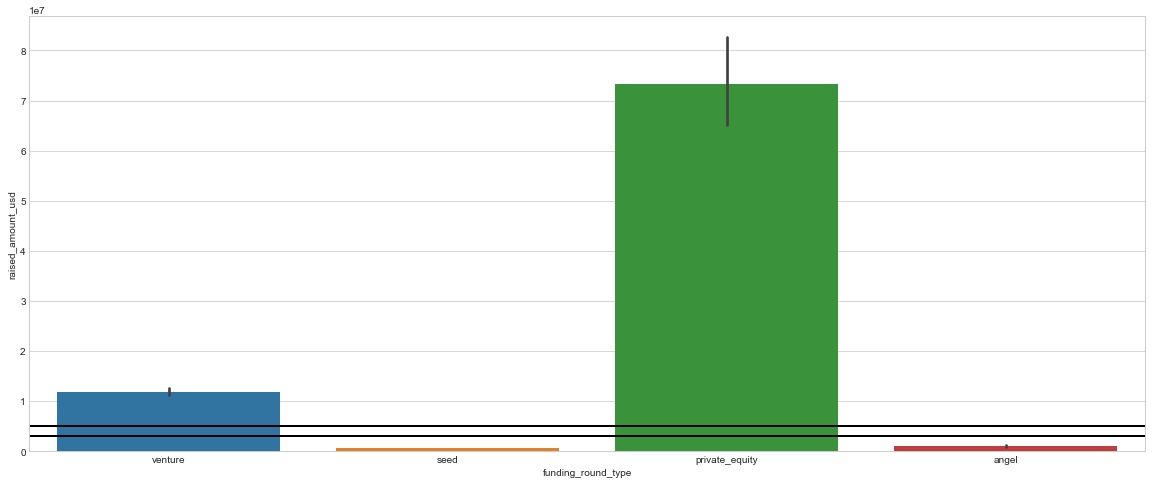

In [175]:
plt.figure(figsize=(20,8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=3000000, linewidth=2, color = 'k')
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.show()

In [47]:
#Averages
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.330859e+07
venture           1.174895e+07
angel             9.586945e+05
seed              7.197796e+05
Name: raised_amount_usd, dtype: float64

In [48]:
#median
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

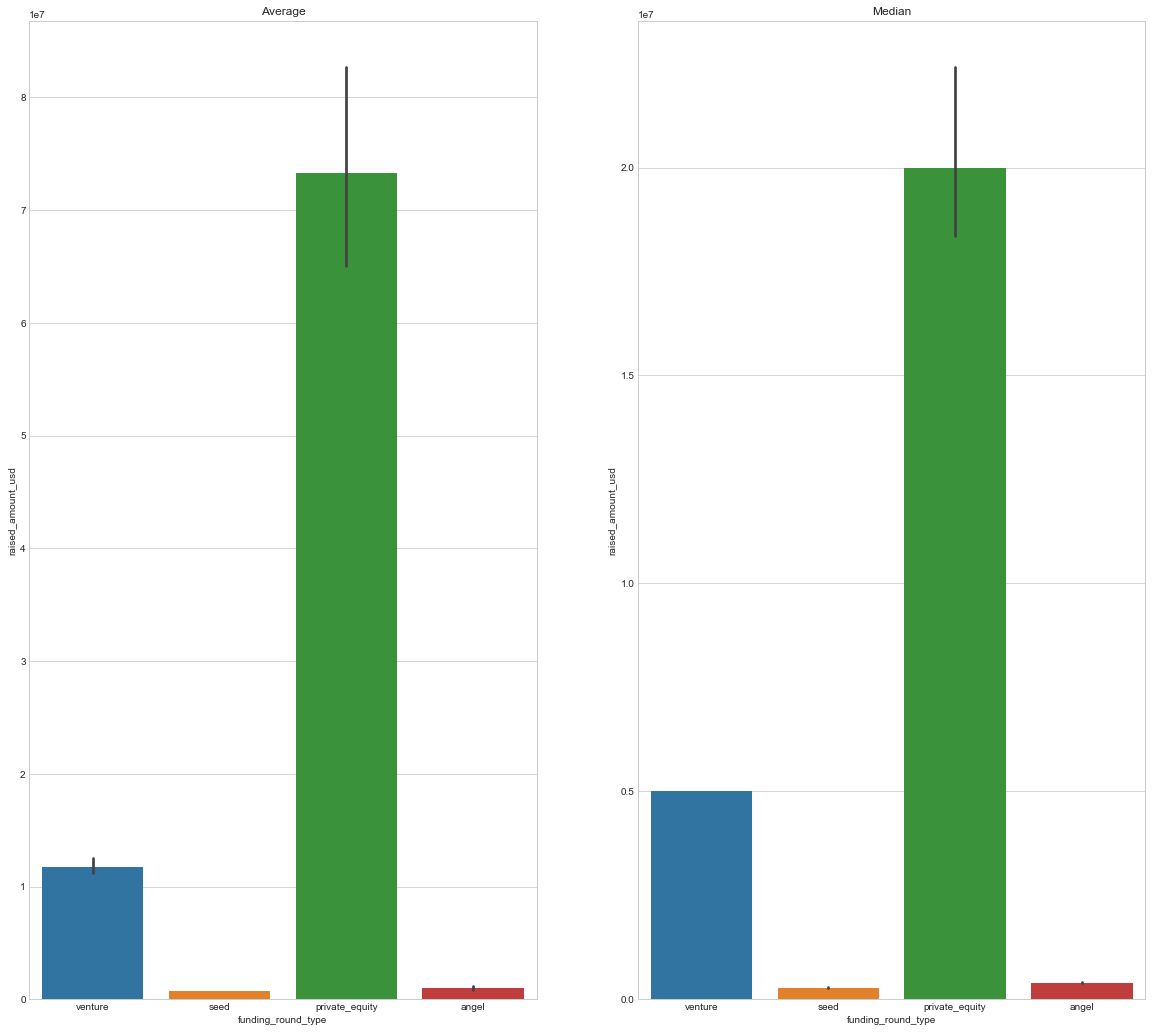

In [49]:
#creating subplots for mean and median
plt.figure(figsize=(20,18))
#subplot 1: barplot for default statistic = mean
plt.subplot(1,2,1)
sns.barplot(x="funding_round_type",y='raised_amount_usd',data=master_frame)
plt.title('Average')
#subplot 2: barplot for default statistic = median
plt.subplot(1,2,2)
sns.barplot(x="funding_round_type",y='raised_amount_usd',data=master_frame, estimator=np.median)
plt.title('Median')
plt.show()



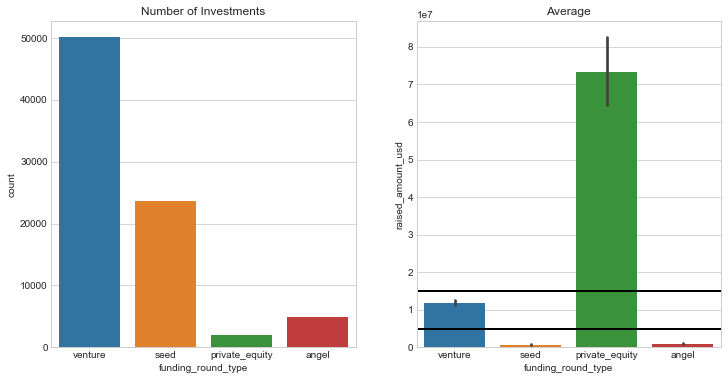

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("Number of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

### Country Analysis###



This is the second goal of analysis — country analysis.

 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

 

 Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

***Identify the top three English-speaking countries in the data frame top9.***

Now that we have found the investment-type suited for sparks funds which is venture-type as it falls within 5-15 million USD and also which have most number of investors. Let us now analyse the countries sparks funds wants to invest in for the venture-type funding.

In [51]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
master_frame.head()


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,value_unknown
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


In [52]:
master_frame.describe()

,raised_amount_usd
count,5.022800e+04
mean,1.174895e+07
std,8.635207e+07
min,0.000000e+00
25%,1.600902e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [53]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114934
Data columns (total 9 columns):
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funded_at                  50228 non-null object
raised_amount_usd          50228 non-null float64
permalink                  50228 non-null object
name                       50228 non-null object
category_list              50228 non-null object
status                     50228 non-null object
country_code               50228 non-null object
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [54]:
master_frame['country_code'].describe()

count     50228
unique       98
top         USA
freq      36139
Name: country_code, dtype: object

In [55]:
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)


country_code
USA              4.225108e+11
CHN              3.983542e+10
value_unknown    2.550611e+10
GBR              2.024563e+10
IND              1.439186e+10
CAN              9.583332e+09
FRA              7.259537e+09
ISR              6.907515e+09
DEU              6.346960e+09
JPN              3.363677e+09
SWE              3.254953e+09
NLD              2.939404e+09
CHE              2.827560e+09
SGP              2.793918e+09
ESP              1.835831e+09
BRA              1.785987e+09
IRL              1.676131e+09
RUS              1.570426e+09
AUS              1.322935e+09
DNK              1.228311e+09
BEL              1.070542e+09
FIN              1.043200e+09
NOR              9.561924e+08
KOR              9.399883e+08
MYS              8.830588e+08
HKG              7.812670e+08
AUT              6.309550e+08
TWN              6.239795e+08
TUR              5.590975e+08
ITA              4.882894e+08
                     ...     
KWT              1.400000e+07
LIE              1.309172e+

In [56]:
#Cleaning the data in category_list
#defining a function to strip the additional values and retaining the first value.
def retaining_first_value(value):
    values=value.split('|')
    if len(values)>1:
        return values[0]
    else:
        return value
print(retaining_first_value('Application Platforms|Real Time|Social Network Media'))
print(retaining_first_value('Social Network Media'))

Application Platforms
Social Network Media


In [57]:
master_frame=master_frame[master_frame['category_list'].notnull()]
master_frame['primary_sector'] = master_frame['category_list'].apply(retaining_first_value)
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

In [58]:
#Creating a new dataframe top9 representing top nine countries with the highest funding
top9 = master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

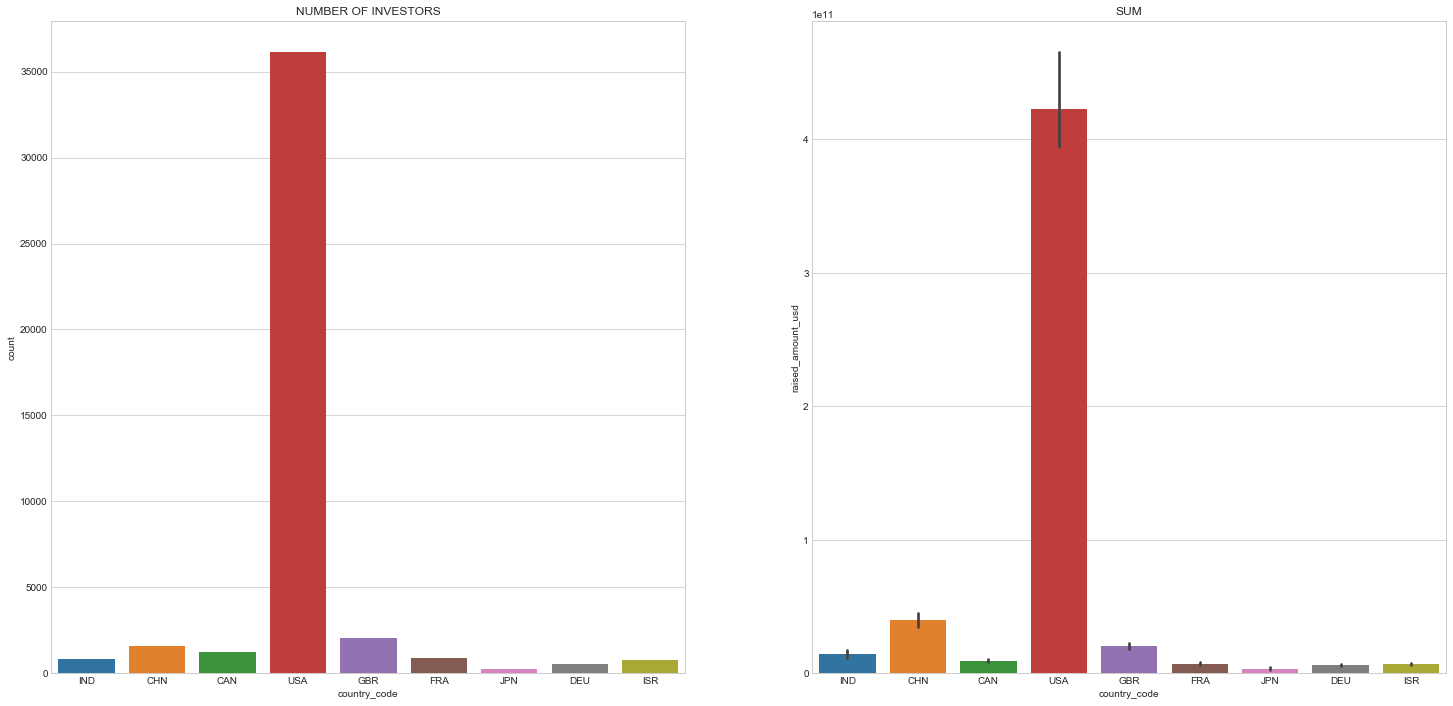

In [131]:
#plotting amount across the top 9 countries
plt.figure(figsize=(25,12))
plt.subplot(1,2,1)
sns.countplot(x='country_code',data=top9)#gives us the count of observations in those nine countries
plt.title("NUMBER OF INVESTORS")
plt.subplot(1,2,2)
sns.barplot(x='country_code',y='raised_amount_usd',data=top9,estimator=sum)#gives us the sum of raised_amount_usd across those 9 countries.
plt.title('SUM')
plt.show()

Now through these barplots we can make it out that our top three english speaking countries are:
1. USA
2. GBR
3. IND

Now that we have our top three countries let us create a new dataframe named 'top3' which we can use for our sector analysis.

In [60]:
top3_english_speaking_countries= top9[top9['country_code'].isin(['USA','GBR','IND'])]
top3_english_speaking_countries.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
Name: raised_amount_usd, dtype: float64

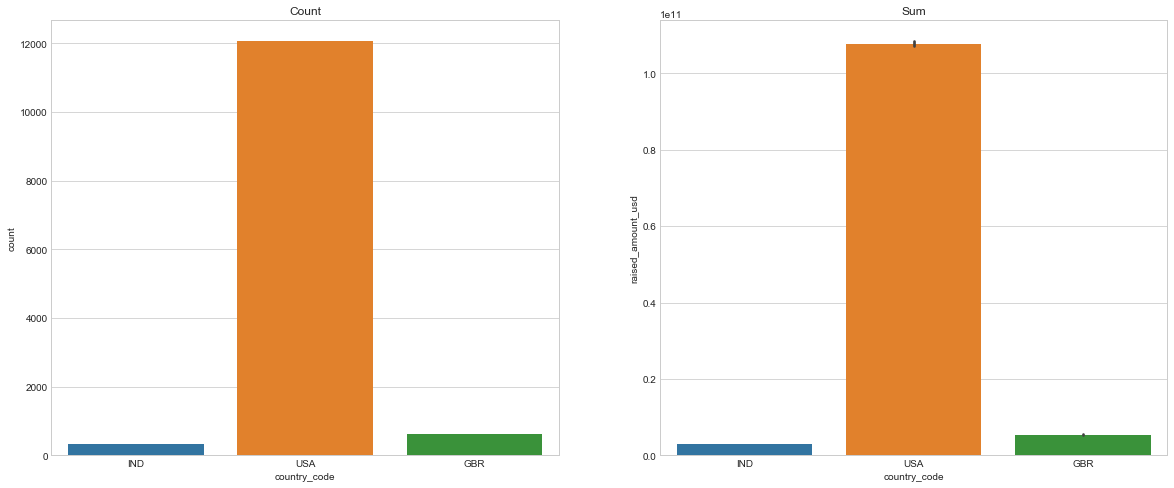

In [127]:
#Plotting barplot for the count of observations and sum across top3 english speaking countries country_code
plt.figure(figsize=(20,8))
#subplot for count of obseervations across country_code of top 3 english speaking countries
plt.subplot(1,2,1)
plt.title('Count')
sns.countplot(x='country_code',data=top3_english_speaking_countries)
#subplot for sum of raised_amount_usd across country_code of top 3 english speaking countries
plt.subplot(1,2,2)
plt.title('Sum')
sns.barplot(x='country_code',y='raised_amount_usd',data=top3_english_speaking_countries,estimator=sum)
plt.show()


### Sector Analysis###

The third goal of analysis is ***sector analysis***.

 

When we say sector analysis, we refer to one of the eight main sectors listed in the mapping file (note that ‘Other’ is one of the eight main sectors; also, there are eight sectors if you consider the category 'Blanks' as a missing value). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

1. ***Extract*** the primary sector of each category list from the ***category_list column***.

2. Use the ***mapping file*** 'mapping.csv' to map each primary sector to one of the eight main sectors. 

***Note:*** ‘Others’ is also considered one of the main sectors.

In [62]:
#Loading mapping.csv file into a new dataframe 'mapping'.
mapping=pd.read_csv("project_data/mapping.csv",encoding='ISO-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


When you observe the data of mapping file we can see that there is a field 'blanks' and there is 'others'; exculding these two fields we have seven major categories.

In [63]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [64]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
#getting all non-zero values from category list
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [66]:
mapping=mapping.drop('value',axis=1)
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [67]:
len(top3_english_speaking_countries)

39018

In [68]:
top3_english_speaking_countries=pd.merge(top3_english_speaking_countries,mapping,how='left',on='primary_sector',indicator=True)
top3_english_speaking_countries.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media,Entertainment,both
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging",both


Since we havent added any rows or columns to top3 dataframe, the length of the dataframe remains same.


In [69]:
len(top3_english_speaking_countries)

39018

In [71]:
#if we observe the merged data of top3 english speaking countries, we can find 'both' in merge column, let us consider only left_only parameters of merge column from the top3 dataframe
left_only=top3_english_speaking_countries[top3_english_speaking_countries['_merge']!='both']
left_only.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
12,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,/organization/100plus,100Plus,Analytics,acquired,USA,analytics,NaN,left_only
43,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,analytics,NaN,left_only


In [72]:
#Now, that we have filtered out the left_only merged records from top3 english speaking countries dataframe, let us now find the unique primary sector name
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'alternative medicine', 'analytics',
       'big data analytics', 'biotechnology and semiconductor',
       'business analytics', 'cannabis', 'career management',
       'cloud management', 'contact management',
       'digital rights management', 'digital signage',
       'document management', 'educational games', 'energy management',
       'event management', 'finance', 'finance technology',
       'financial exchanges', 'financial services', 'fleet management',
       'governance', 'greentech', 'identity management',
       'innovation management', 'intellectual asset management',
       'investment management', 'it management', 'journalism',
       'knowledge management', 'lead management', 'mobile analytics',
       'nanotechnology', 'natural gas uses',
       'natural language processing', 'navigation', 'personal finance',
       'personalization', 'product search', 'professional networking',
       'professional services', 'project management',
   

In [73]:
#finding primary sector values from mapping dataframe
mapping.primary_sector.sort_values(ascending=True)

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
3442                   3d printing
3443                 3d technology
5526                      a0lytics
5508                    accounting
2757              active lifestyle
5510                  ad targeting
3447            advanced materials
8                 adventure travel
5513                   advertising
5514         advertising exchanges
5515          advertising networks
5516         advertising platforms
4829                        advice
14                       aerospace
3455                   agriculture
1392         air pollution control
4833                    algorithms
4834                   all markets
4835                  all students
2772           alter0tive medicine
4837                        alumni
5527                       android
4840                        angels
2777                

From the above data report it is clearly visible that 'na' is misspelt as 0. We now need to correct it by deining a function to replace 0 with 'na'.

In [75]:
#function to replace 0 with 'na'
# we can import regular expressions package in order to replace it.
import re
mapping['primary_sector']=mapping.primary_sector.apply(lambda x: re.sub('[0]','na',str(x)))

In [76]:
top3_english_speaking_countries = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english_speaking_countries = pd.merge(top3_english_speaking_countries, mapping, how='left', on='primary_sector', indicator=True)
left_only = top3_english_speaking_countries[top3_english_speaking_countries['_merge'] != 'both']
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'biotechnology and semiconductor',
       'enterprise 2.0', 'greentech', 'natural gas uses',
       'product search', 'racing', 'rapidly expanding', 'retirement',
       'specialty retail', 'undefined'], dtype=object)

In [77]:
mapping.primary_sector.sort_values(ascending=True)

3441                                    3d
3442                           3d printing
3443                         3d technology
5508                            accounting
2757                      active lifestyle
5510                          ad targeting
3447                    advanced materials
8                         adventure travel
5513                           advertising
5514                 advertising exchanges
5515                  advertising networks
5516                 advertising platforms
4829                                advice
14                               aerospace
3455                           agriculture
1392                 air pollution control
4833                            algorithms
4834                           all markets
4835                          all students
2772                  alternative medicine
4837                                alumni
5526                             analytics
5527                               android
4840       

In [79]:
#Now let us remove rows which does not have 'both' 
top3_english_speaking_countries=top3_english_speaking_countries[top3_english_speaking_countries['_merge']=='both']
top3_english_speaking_countries=top3_english_speaking_countries.drop('_merge',axis=1)
top3_english_speaking_countries.head()





,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging"


In [80]:
top3_english_speaking_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 39017
Data columns (total 11 columns):
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


In [83]:
#Let us now remove rows whose investment doesnt lie between 5 million USD and 15 million USD
top3_english_speaking_countries = top3_english_speaking_countries.drop(top3_english_speaking_countries[(top3_english_speaking_countries.raised_amount_usd < 5000000)].index)
top3_english_speaking_countries = top3_english_speaking_countries.drop(top3_english_speaking_countries[(top3_english_speaking_countries.raised_amount_usd > 15000000)].index)
#Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.
D1 = top3_english_speaking_countries[top3_english_speaking_countries['country_code'] == 'USA']
D2 = top3_english_speaking_countries[top3_english_speaking_countries['country_code'] == 'GBR']
D3 = top3_english_speaking_countries[top3_english_speaking_countries['country_code'] == 'IND']

In [87]:
#calculating length of each of the new dataframes D1,D2 and D3.
#total number of investments
len(D1)

12063

In [85]:
len(D2)

621

In [86]:
len(D3)

328

In [91]:
#USA
D1['raised_amount_usd'].describe()

count    1.206300e+04
mean     8.932861e+06
std      3.075861e+06
min      5.000000e+06
25%      6.000970e+06
50%      8.300000e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [92]:
#total amount of investments
D1['raised_amount_usd'].sum()

107757097294.0

In [93]:
D1.pivot_table(values='raised_amount_usd',index=['main_sector'], aggfunc={'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,1.454104e+09
Cleantech / Semiconductors,2350,2.163343e+10
Entertainment,591,5.099198e+09
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
"News, Search and Messaging",1583,1.397157e+10
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10


In [94]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)


main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [95]:
D1[D1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [113]:
D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

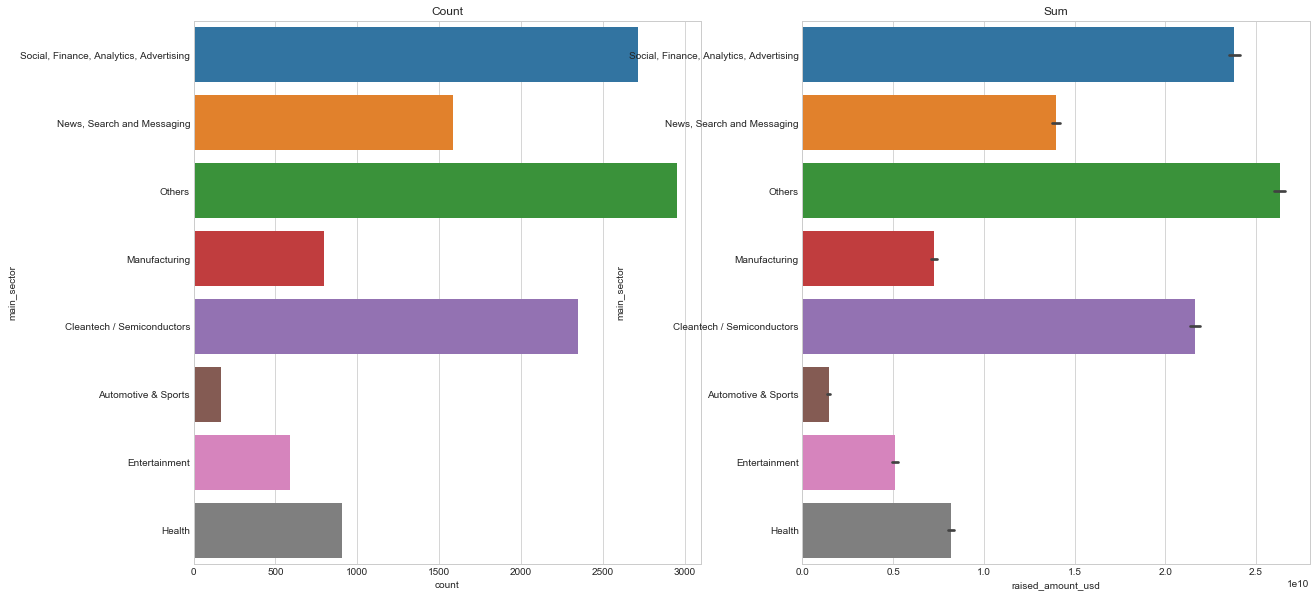

In [114]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()


In [97]:
#GBR
D2['raised_amount_usd'].describe()

count    6.210000e+02
mean     8.661962e+06
std      2.867167e+06
min      5.000000e+06
25%      6.084330e+06
50%      8.000000e+06
75%      1.060676e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [98]:
D2['raised_amount_usd'].sum()

5379078691.0

In [99]:
D2.pivot_table(values='raised_amount_usd',index=['main_sector'], aggfunc={'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,1.670516e+08
Cleantech / Semiconductors,130,1.163990e+09
Entertainment,56,4.827847e+08
Health,24,2.145375e+08
Manufacturing,42,3.619403e+08
"News, Search and Messaging",73,6.157462e+08
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09


In [100]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)


main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [103]:
D2[D2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [104]:
D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

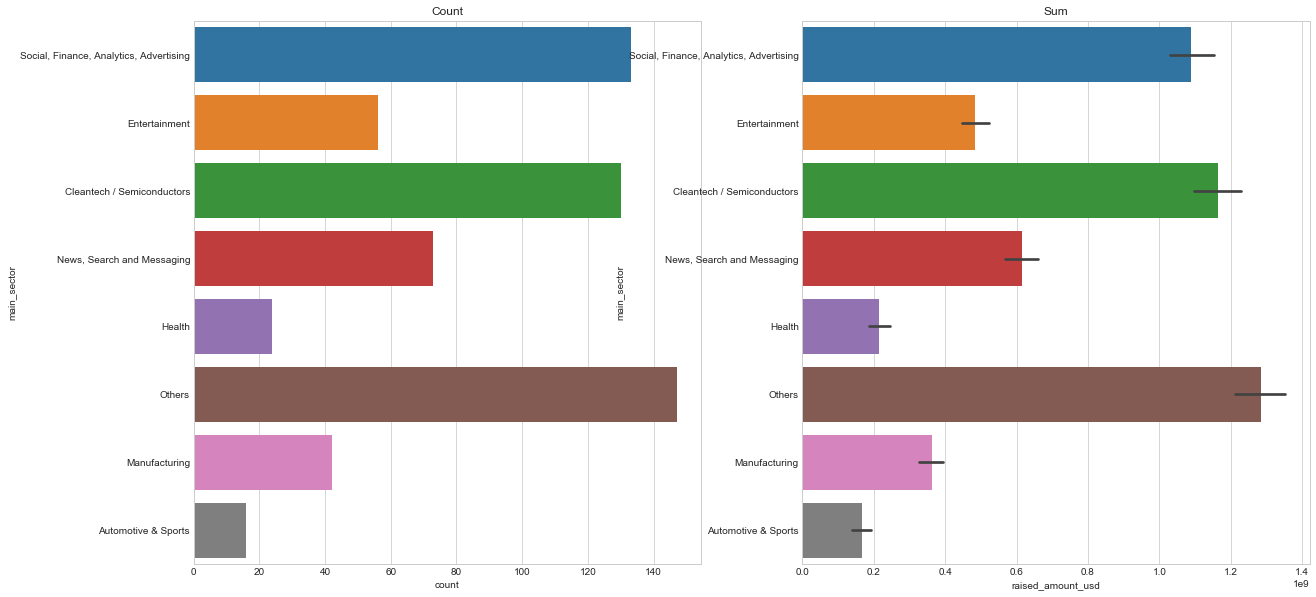

In [115]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D2)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()

In [105]:
#IND
D3['raised_amount_usd'].describe()

count    3.280000e+02
mean     8.992511e+06
std      3.219811e+06
min      5.000000e+06
25%      6.000000e+06
50%      8.700000e+06
75%      1.055500e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [106]:
D3['raised_amount_usd'].sum()

2949543602.0

In [107]:
D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})


,count,sum
main_sector,,
Automotive & Sports,13,1.369000e+08
Cleantech / Semiconductors,20,1.653800e+08
Entertainment,33,2.808300e+08
Health,19,1.677400e+08
Manufacturing,21,2.009000e+08
"News, Search and Messaging",52,4.338345e+08
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08


In [108]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)


main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [110]:
D3[D3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()


permalink
/organization/firstcry-com        39000000.0
/organization/myntra              38000000.0
/organization/commonfloor         32900000.0
/organization/pepperfry-com       28000000.0
/organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [112]:
D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()


permalink
/organization/manthan-systems               50700000.0
/organization/komli-media                   28000000.0
/organization/shopclues-com                 25000000.0
/organization/intarvo                       21900000.0
/organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

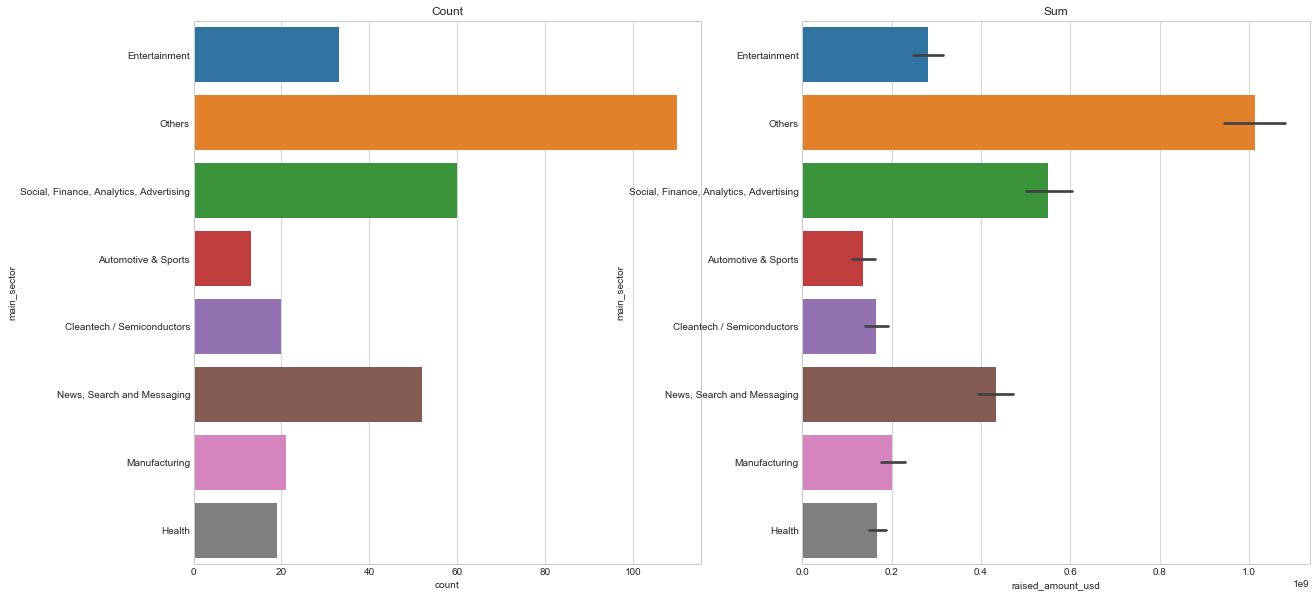

In [116]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D3)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum")
plt.show()

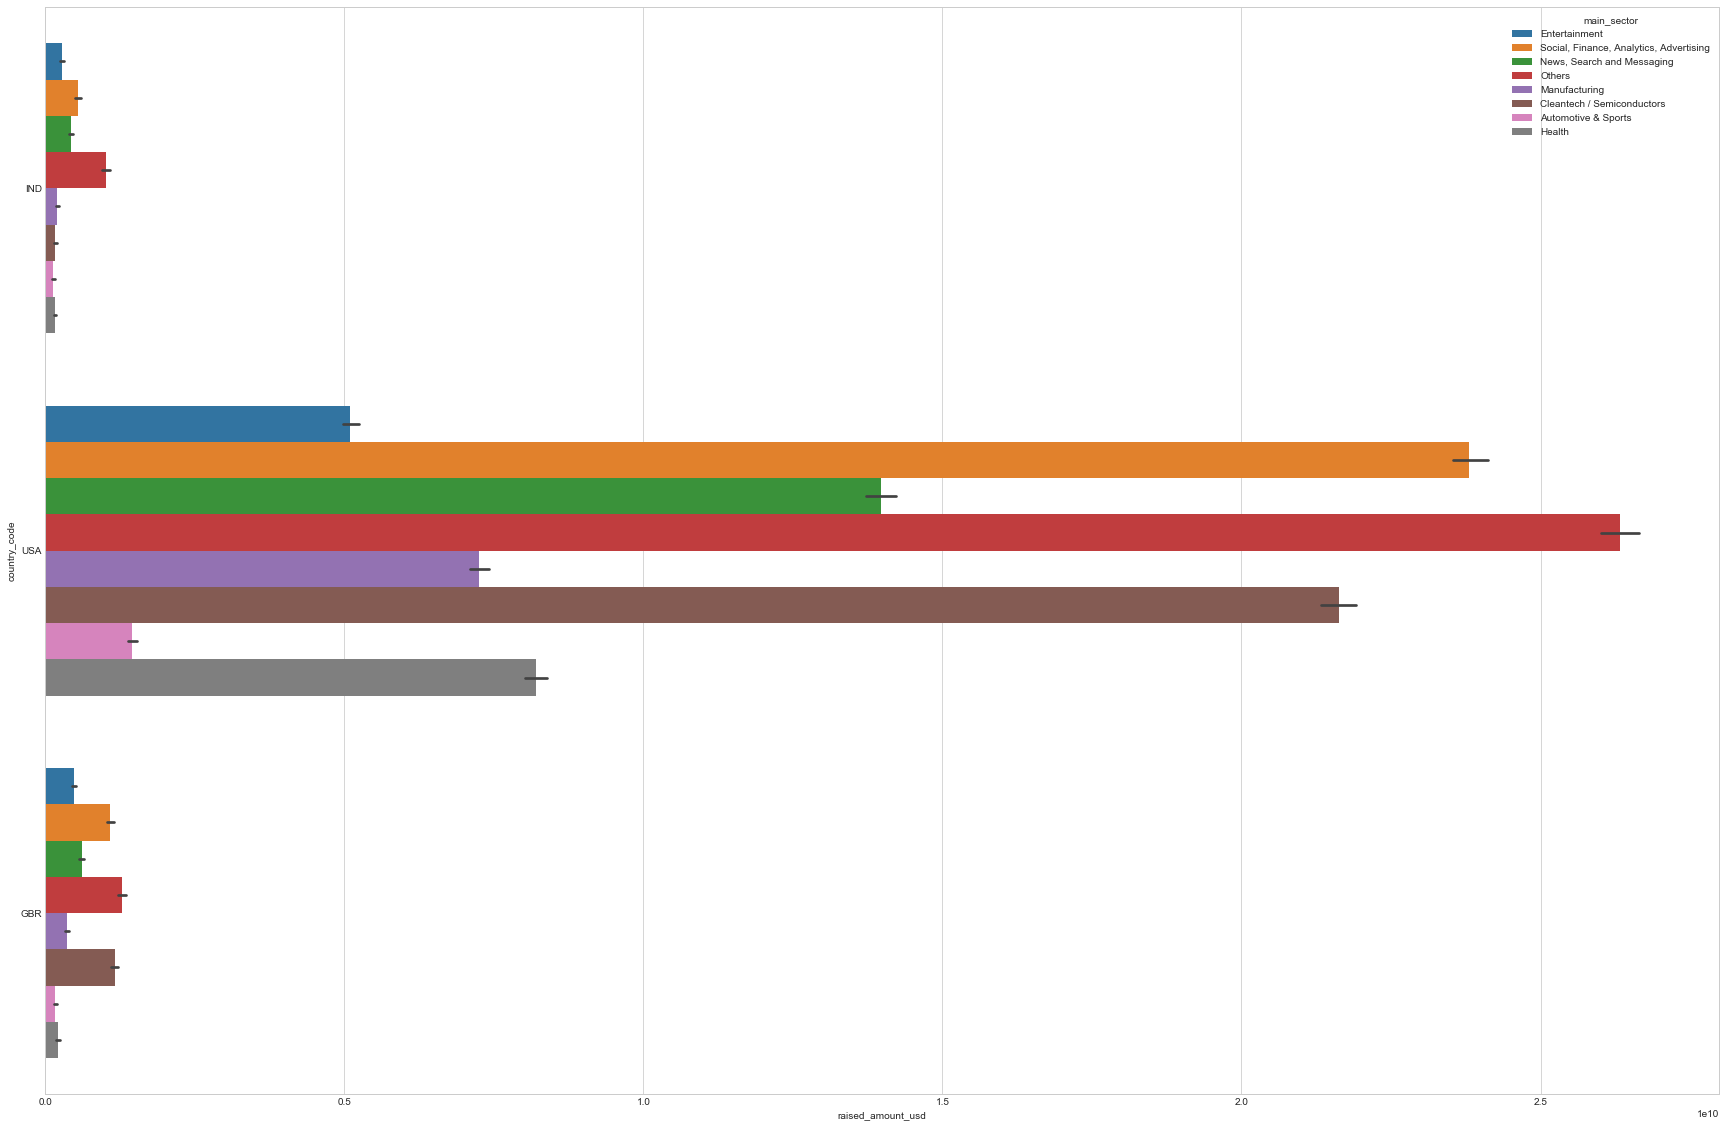

In [117]:
# specify hue="categorical_variable"
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=top3_english_speaking_countries, estimator=np.sum)
plt.show()

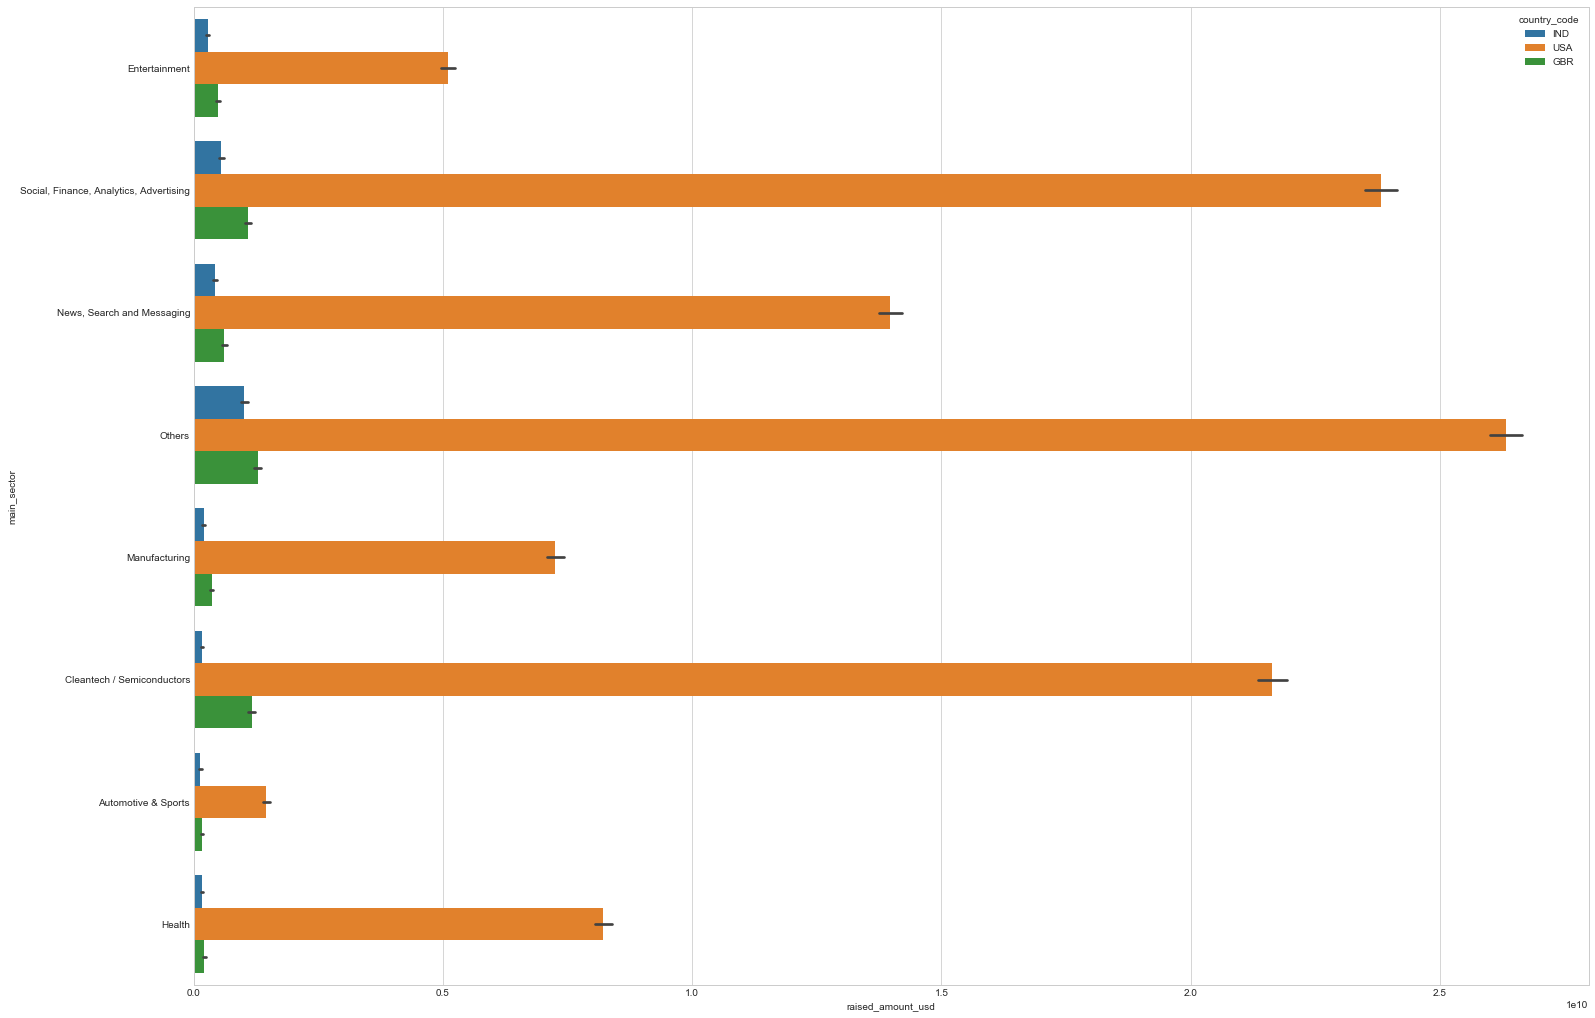

In [124]:
plt.figure(figsize=(25, 18))
sns.barplot(y='main_sector', x='raised_amount_usd', hue="country_code", data=top3_english_speaking_countries, estimator=np.sum)
plt.show()

In [120]:
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D1

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
17,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,service providers,Others
29,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/organization/170-systems,170 Systems,Software,acquired,USA,software,Others
31,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,education,Others
32,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,education,Others
36,/funding-round/3d2463c9b97f32b3be8747fbd629961f,venture,11-02-2010,5000000.0,/organization/1bog,One Block Off the Grid (1BOG),Clean Technology|Residential Solar,closed,USA,clean technology,Cleantech / Semiconductors
41,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,/organization/1stdibs,1stdibs,E-Commerce,operating,USA,e-commerce,Others
57,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,17-11-2013,5050000.0,/organization/21e6,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,big data,"Social, Finance, Analytics, Advertising"
58,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,18-09-2014,10000000.0,/organization/22nd-century-group,22nd Century Group,Biotechnology,ipo,USA,biotechnology,Cleantech / Semiconductors
63,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,07-01-2011,9000000.0,/organization/23andme,23andMe,Biotechnology|Search,operating,USA,biotechnology,Cleantech / Semiconductors


In [121]:
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
108,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,"Social, Finance, Analytics, Advertising"
307,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,18-05-2015,8259067.0,/organization/abcodia,Abcodia,Biotechnology,operating,GBR,biotechnology,Cleantech / Semiconductors
383,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,31-03-2011,10000000.0,/organization/acacia-pharma,Acacia Pharma,Biotechnology,operating,GBR,biotechnology,Cleantech / Semiconductors
395,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,15-06-2011,9910333.0,/organization/acal-energy,ACAL Energy,Clean Technology,operating,GBR,clean technology,Cleantech / Semiconductors
398,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10720178.0,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,Information Technology,operating,GBR,information technology,"Social, Finance, Analytics, Advertising"
623,/funding-round/064999587157b0ceae7843204a105d6d,venture,28-09-2015,13359377.0,/organization/acs-clothing,ACS Clothing,E-Commerce,operating,GBR,e-commerce,Others
624,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,02-03-2014,12879637.0,/organization/acs-clothing,ACS Clothing,E-Commerce,operating,GBR,e-commerce,Others
843,/funding-round/71f1b5903874817292d67e1ac6aa66b2,venture,11-03-2014,7500000.0,/organization/adbrain,Adbrain,Advertising|Enterprise Software|Marketing Auto...,operating,GBR,advertising,"Social, Finance, Analytics, Advertising"
921,/funding-round/5bcca548aeccd5acdea0d0edb086db8d,venture,07-05-2014,6772812.0,/organization/adinsight,ResponseTap,Advertising|Enterprise Software|SaaS,operating,GBR,advertising,"Social, Finance, Analytics, Advertising"
927,/funding-round/83653befbf3c473ec97a1617479448c8,venture,01-03-2008,6500000.0,/organization/adjug,Adjug,Advertising|Internet|Marketplaces|Publishing,acquired,GBR,advertising,"Social, Finance, Analytics, Advertising"


In [122]:
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D3

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
55,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,e-commerce,Others
278,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
1269,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/organization/agile,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
1529,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5000000.0,/organization/akosha,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,consumer internet,"Social, Finance, Analytics, Advertising"
1924,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5500000.0,/organization/amagi-media-labs,Amagi Media Labs,Advertising,operating,IND,advertising,"Social, Finance, Analytics, Advertising"
2028,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5000000.0,/organization/ameyo,Ameyo,Software,operating,IND,software,Others
2240,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,26-03-2014,5000000.0,/organization/annapurna-microfinace,Annapurna Microfinace,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
2396,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,01-12-2007,15000000.0,/organization/apnaloan,ApnaPaisa,Credit|Finance|Marketplaces,operating,IND,credit,"Social, Finance, Analytics, Advertising"
2507,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,29-06-2006,10000000.0,/organization/applabs,AppLabs,Software,acquired,IND,software,Others
2611,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,10-04-2014,5000000.0,/organization/appsdaily-solutions,Appsdaily Solutions,Software,operating,IND,software,Others


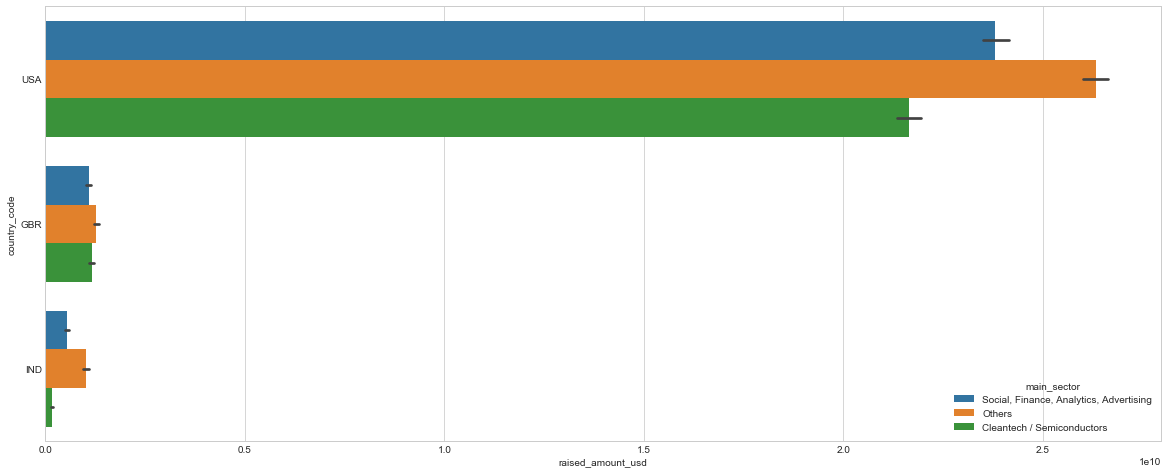

In [126]:
#plotting a barplot showing the number of investments in the top 3 sectors of the top 3 countries for venture-type funding.
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 8))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()